## Câu 1
### Bài toán phân loại và hồi quy sử dụng các phương pháp học máy

### Mục tiêu
Sử dụng các phương pháp học máy đã học (và có thể mở rộng thêm các phương pháp khác) để giải bài toán theo cả hai hướng: phân loại (classification) và hồi quy (regression). Thực hiện quy trình gồm các bước dưới đây để xử lý và đánh giá bài toán.

---

### Các bước thực hiện

#### 1. Thống kê đặc điểm của dữ liệu bằng Data Visualization
   - Khám phá đặc điểm tổng quát của dữ liệu, bao gồm phân phối của các biến, sự tương quan giữa các đặc trưng, và xác định các mẫu dữ liệu bất thường (outliers).
   - Sử dụng các biểu đồ như histogram, boxplot, scatter plot, heatmap,... để thể hiện trực quan các đặc điểm này.

#### 2. Tiền xử lý dữ liệu
   - **Type Conversion**: Chuyển đổi kiểu dữ liệu nếu cần thiết (ví dụ: từ dạng chuỗi sang số hoặc nhãn phân loại).
   - **Data Normalization**: Chuẩn hóa dữ liệu để đưa các giá trị về cùng thang đo, tăng hiệu quả của các thuật toán học máy.

#### 3. Phân chia dữ liệu thành tập train và tập evaluation
   - Chia dữ liệu thành hai tập: **Train** và **Evaluation** theo tỷ lệ phù hợp (ví dụ 80/20 hoặc 70/30).
   - Đảm bảo rằng cả hai tập này đều có phân phối dữ liệu phù hợp để đảm bảo tính đại diện.

#### 4. Thực hiện phân loại và hồi quy
   - **Phân loại (Classification)**: Áp dụng các phương pháp phân loại khác nhau như SVM, KNN, Random Forest, hoặc các thuật toán khác.
   - **Hồi quy (Regression)**: Thử nghiệm các phương pháp hồi quy như Linear Regression, Decision Tree Regressor, SVR,...

#### 5. Đánh giá kết quả và so sánh các phương pháp
   - Đánh giá hiệu quả của các phương pháp bằng các chỉ số như độ chính xác, F1-score cho phân loại, hoặc MAE, RMSE cho hồi quy.
   - **So sánh các phương pháp**: Sử dụng biểu đồ để hiển thị kết quả của các phương pháp phân loại và hồi quy, cho phép quan sát sự khác biệt giữa các phương pháp một cách trực quan.
   - **Biểu đồ trực quan**: Ví dụ sử dụng bar chart hoặc line chart để thể hiện độ chính xác, lỗi trung bình của các phương pháp.

---

### Kết luận
Tóm tắt các kết quả đạt được từ các phương pháp phân loại và hồi quy, nêu bật phương pháp hiệu quả nhất trong việc giải quyết bài toán.


## Thêm các thư viện

In [2]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45916 sha256=878838c217677386fd0f18433b111d91347807b5a9d1b0c57b4c940484972540
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot, boxcox
import pylab
from jcopml.plot import plot_residual, plot_actual_vs_prediction, plot_roc_curve


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [5]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

## Thống kê dữ liệu

### Tổng quan dữ liệu

In [6]:
pd.options.display.max_columns = None

In [7]:
rental = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';', encoding='latin1')

rental.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [8]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [9]:
rental.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [10]:
rental.shape

(10000, 22)

### Kiểm tra dữ liệu bị thiếu

In [11]:
rental.isnull().sum()

,0
id,0
category,0
title,0
body,0
amenities,3549
bathrooms,34
bedrooms,7
currency,0
fee,0
has_photo,0


In [12]:
rental.pets_allowed.value_counts()

,count
pets_allowed,
"Cats,Dogs",5228
Cats,485
Dogs,124


In [13]:
rental.loc[rental['pets_allowed'].isna(), 'pets_allowed'] = 'None'

In [14]:
rental.loc[rental['cityname'].isna() | rental['state'].isna(), ['longitude', 'latitude']].value_counts()

,,count
longitude,latitude,
-98.5576,39.8163,66
-82.1971,28.4590,1


In [15]:
rental = rental.drop(columns=['address'])

In [16]:
rental = rental.dropna(subset=['bathrooms', 'bedrooms', 'price', 'price_display', 'latitude', 'longitude'])
rental.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,3508
bathrooms,0
bedrooms,0
currency,0
fee,0
has_photo,0


In [17]:
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-98.5576), 'cityname'] = 'Lebanon'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-98.5576), 'state'] = 'KS'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-75.9597), 'cityname'] = 'Cape Charles'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-75.9597), 'state'] = 'VA'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-92.2006), 'cityname'] = 'Waynesville'
rental.loc[((rental['cityname'].isna()) | (rental['state'].isna())) & (rental['longitude']==-92.2006), 'state'] = 'MO'

rental = rental.dropna(subset=['cityname', 'state'])
rental.loc[:, ['cityname', 'state']].isna().sum()

,0
cityname,0
state,0


In [18]:
rental['amenities'].value_counts()

,count
amenities,
Parking,229
"Dishwasher,Refrigerator",225
Pool,168
"Dishwasher,Parking,Pool",149
Dishwasher,147
...,...
"Cable or Satellite,Dishwasher,Internet Access,Parking",1
"Cable or Satellite,Clubhouse,Dishwasher,Hot Tub,Internet Access,Parking,Patio/Deck,Pool,Refrigerator",1
"Cable or Satellite,Internet Access,Parking,Wood Floors",1


In [19]:
rental.loc[:, 'amenities'] = rental['amenities'].fillna(value='basic')

luxury_amenities = [
    "Gym", "Pool", "Clubhouse", "Hot Tub",
    "Doorman", "Gated", "View",
    "Tennis", "Elevator", "Fireplace",
    "Basketball Court", "Basketball", "Playground"
]

luxury_pattern = '|'.join(luxury_amenities)

rental.loc[:, 'amenities'] = ['luxury' if any(amenity in x for amenity in luxury_amenities) else 'basic' for x in rental['amenities']]

print(rental['amenities'].value_counts())

amenities
basic     5593
luxury    4356
Name: count, dtype: int64


In [20]:
rental.isna().sum()

,0
id,0
category,0
title,0
body,0
amenities,0
bathrooms,0
bedrooms,0
currency,0
fee,0
has_photo,0


In [21]:
rental['fee'].value_counts()

,count
fee,
No,9949


In [22]:
rental = rental.drop(['title', 'body', 'id'], axis=1)
rental = rental.drop(['category', 'currency', 'fee'], axis=1)
rental = rental.drop(['price_type'], axis=1)
rental = rental.drop(['price_display'],axis=1)

In [23]:
numer = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'time']
rental.loc[:, numer].describe()

,bathrooms,bedrooms,price,square_feet,time
count,9949.000000,9949.000000,9949.000000,9949.000000,9.949000e+03
mean,1.380591,1.747512,1487.647502,943.285456,1.574881e+09
std,0.615332,0.941587,1077.387033,526.440776,3.767721e+06
min,1.000000,0.000000,200.000000,107.000000,1.568744e+09
25%,1.000000,1.000000,950.000000,650.000000,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,1.577362e+09


### Trực quan hóa dữ liệu

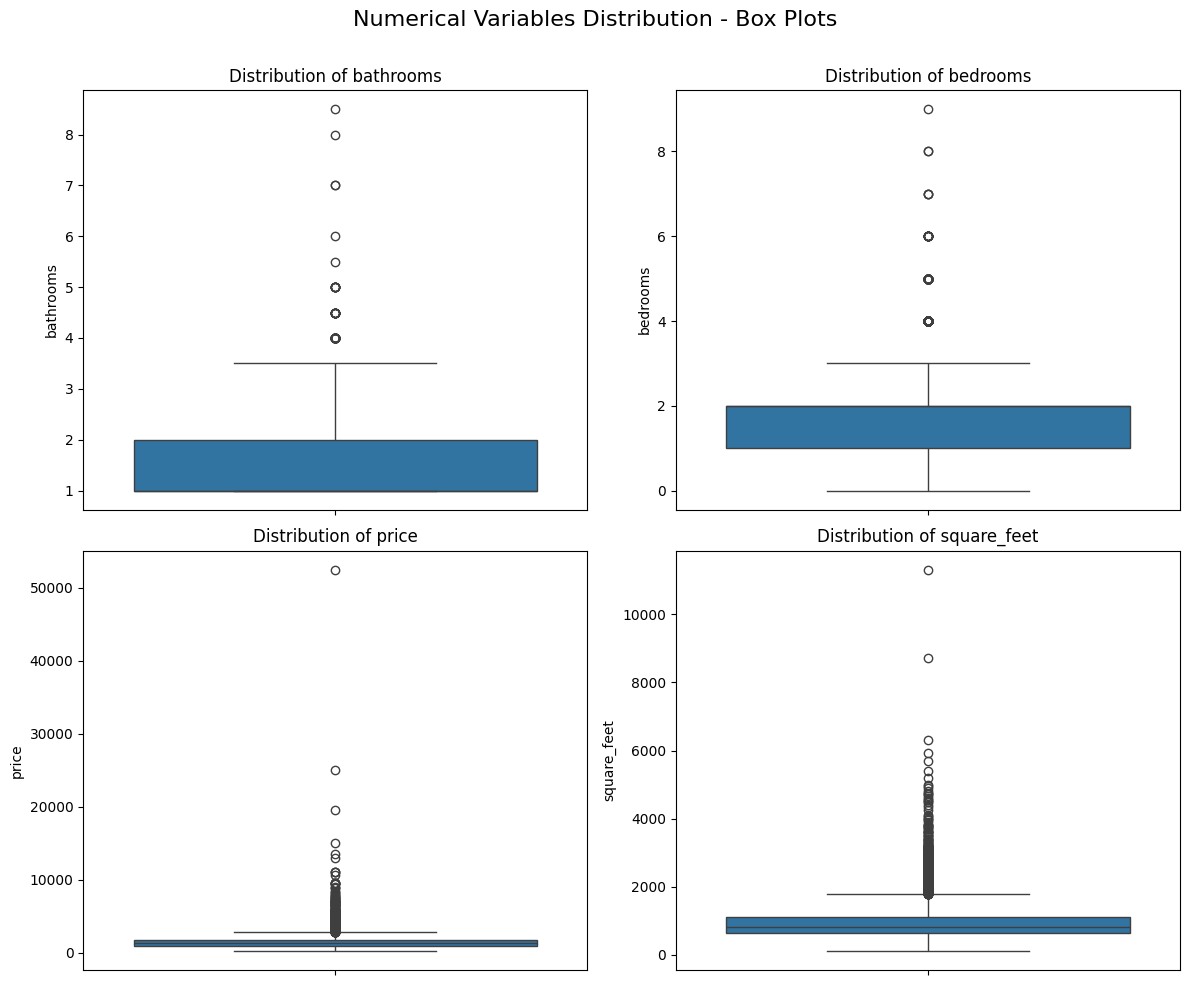

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, feature in zip(axes.flatten(), numer[:4]):
    sns.boxplot(y=rental[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_ylabel(feature)


fig.suptitle("Numerical Variables Distribution - Box Plots", fontsize=16)
fig.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

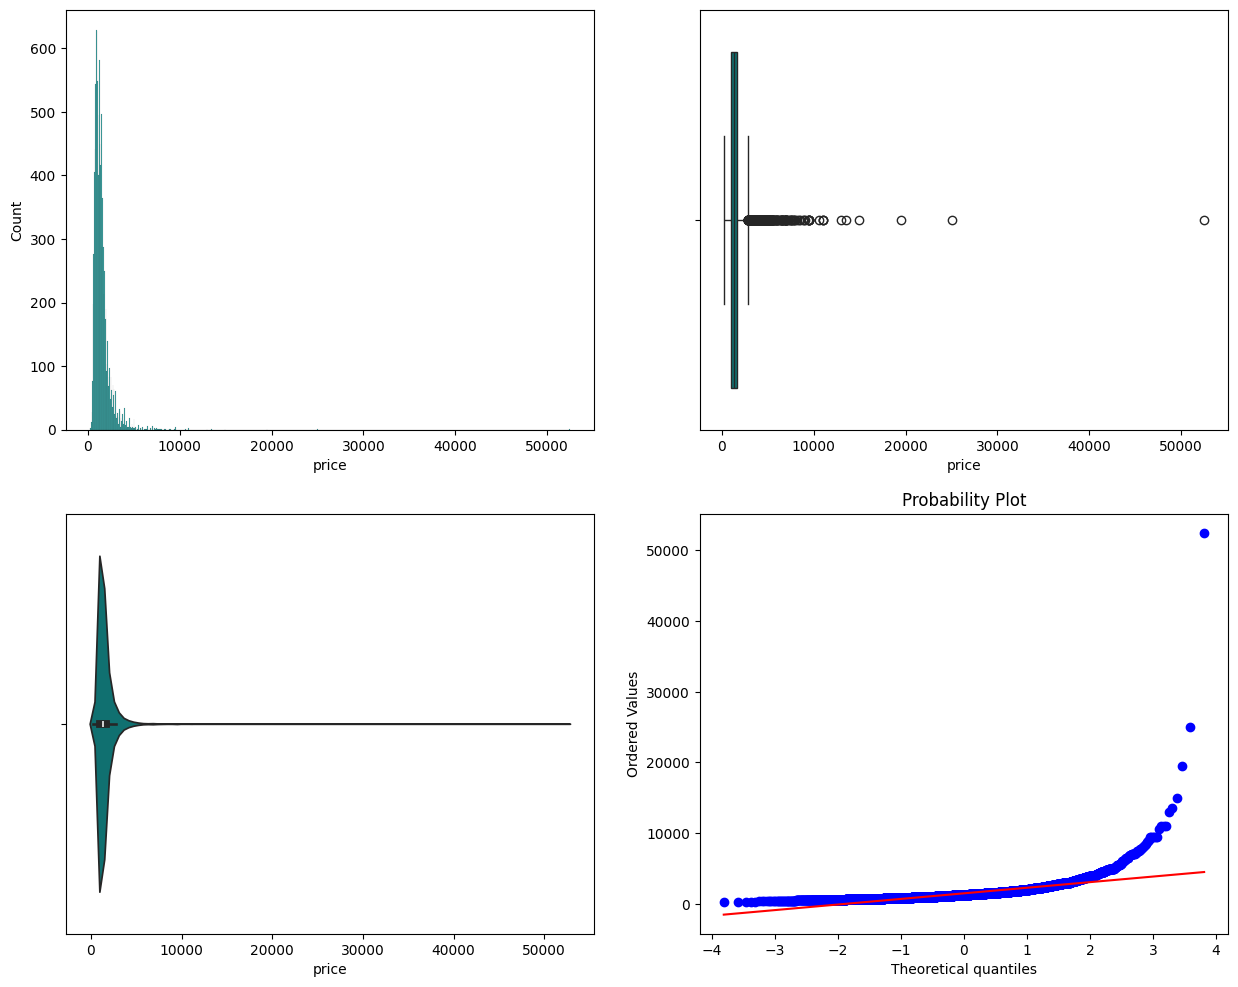

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax1 = sns.histplot(x = rental['price'], color='teal', ax= ax[0, 0])
ax2 = sns.boxplot(x = rental['price'], ax= ax[0, 1], color= 'teal')
ax3 = sns.violinplot(x = rental['price'], ax= ax[1, 0], color= 'teal')
ax4 = probplot(rental['price'], plot=pylab)
pylab.show()

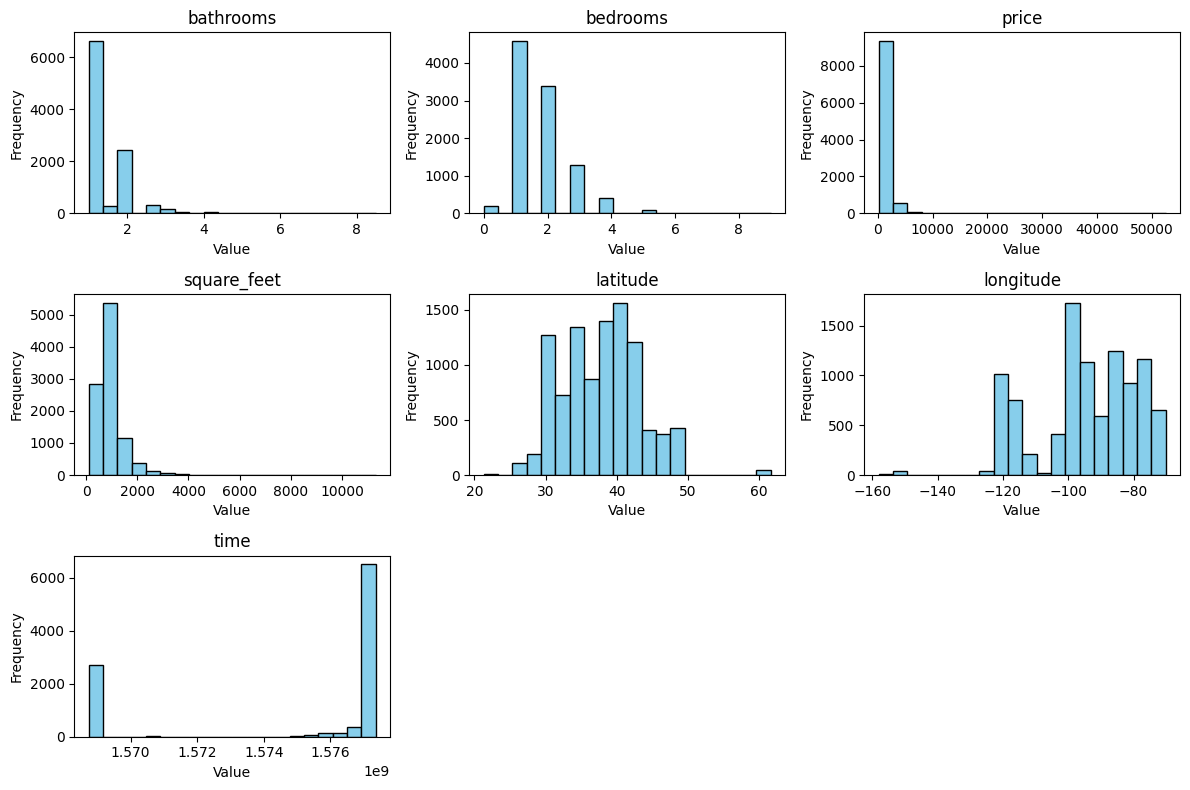

In [26]:
numerical_columns = rental.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(rental[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

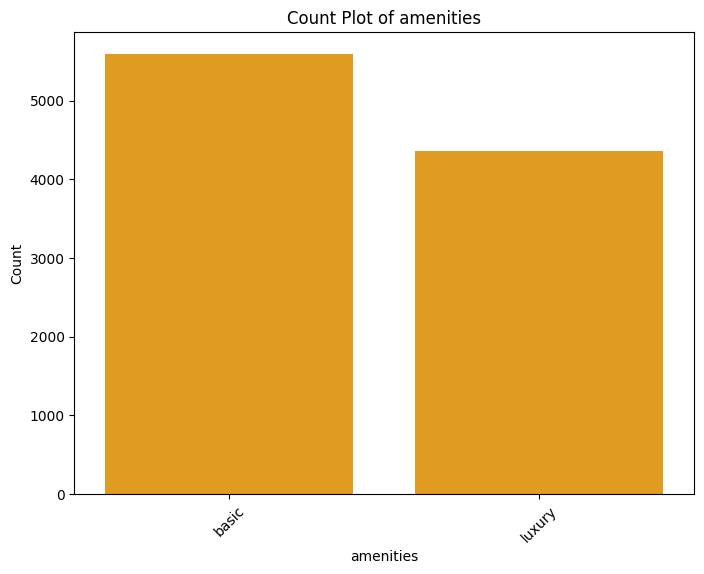

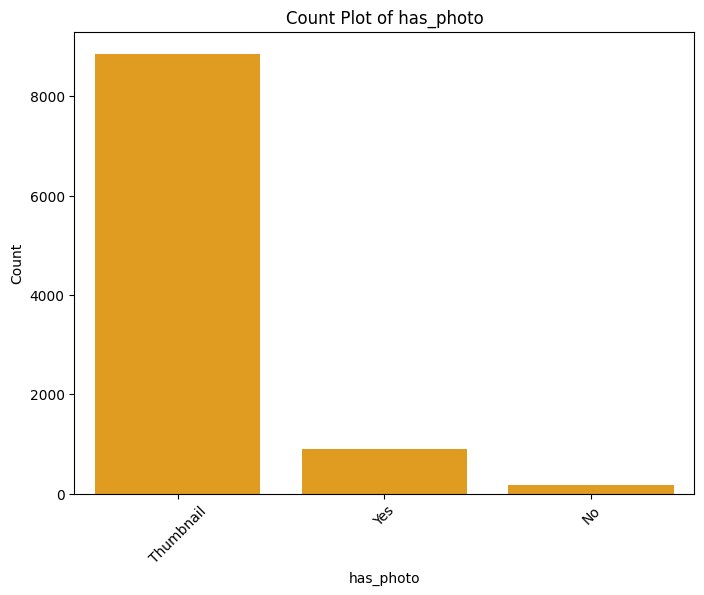

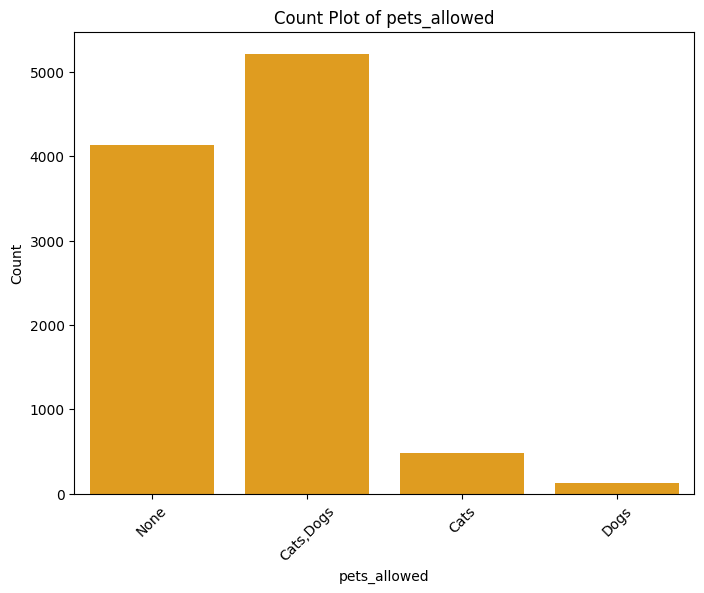

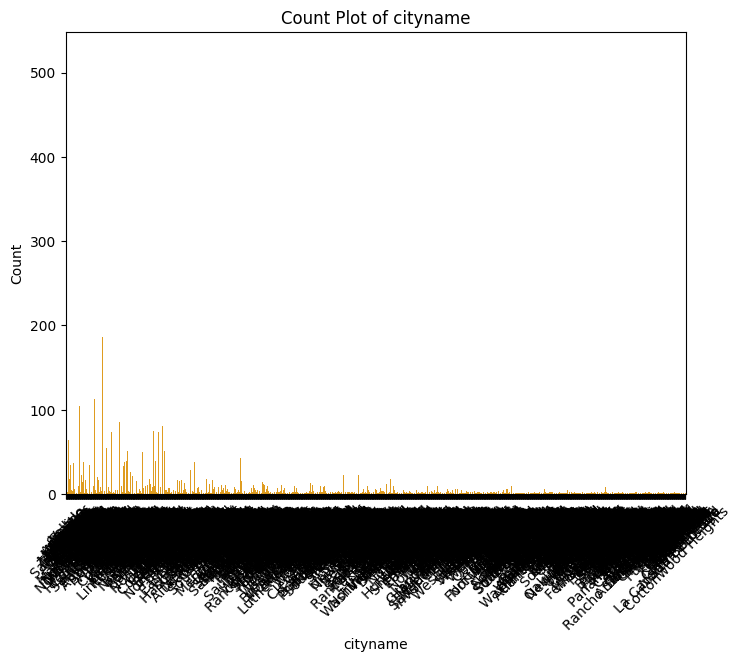

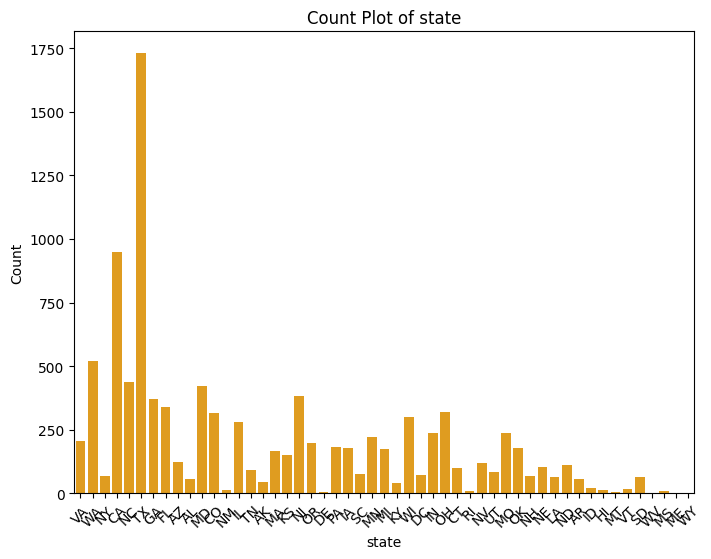

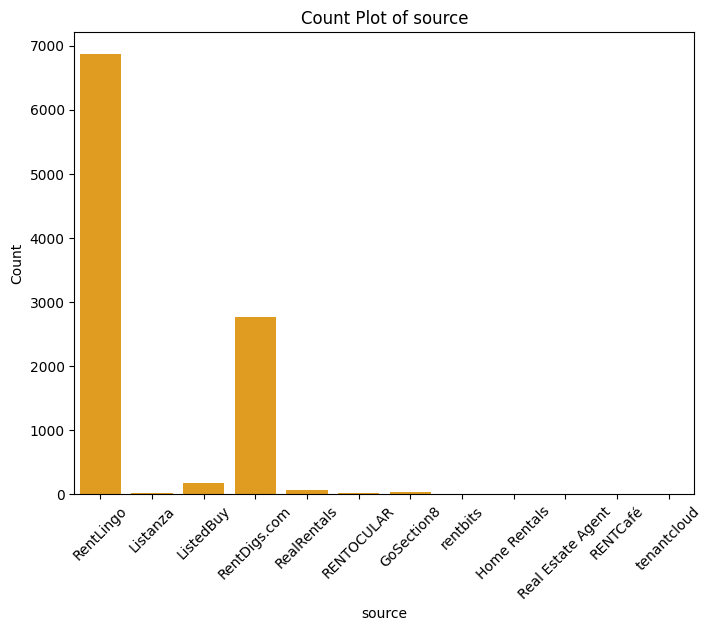

In [27]:
# Select categorical columns
categorical_columns = rental.select_dtypes(include='object')

# Plot count plots
for column in categorical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=rental, x=column, color='orange')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [28]:
# import folium

# map_center = [rental['latitude'].mean(), rental['longitude'].mean()]
# mymap = folium.Map(location=map_center, zoom_start=10)

# mean_price = rental['price'].mean()
# std_price = rental['price'].std()

# for idx, row in rental.iterrows():
#     if row['price'] < mean_price - std_price:
#         color = 'green'
#     elif mean_price - std_price <= row['price'] <= mean_price + std_price:
#         color = 'blue'
#     else:
#         color = 'red'

#     folium.CircleMarker(
#         location=[row['latitude'], row['longitude']],
#         radius=5,
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.6,
#         tooltip=f"{row['cityname']}: ${row['price']}"
#     ).add_to(mymap)

# mymap.save('map.html')

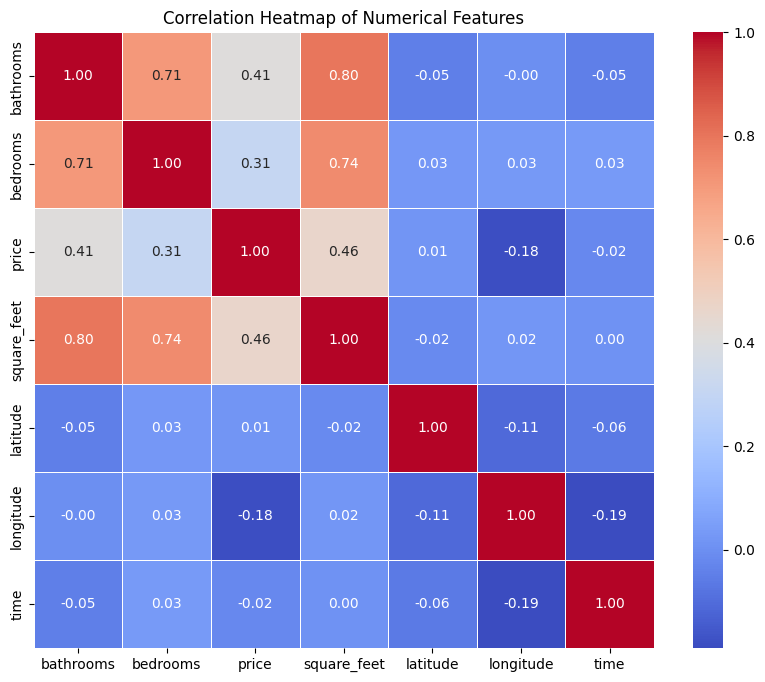

In [29]:
numerical_columns = rental.select_dtypes(include=['float64', 'int64'])

corr_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Xử lý dữ liệu

In [30]:
rental.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9949.000000,9949.000000,9949.000000,9949.000000,9949.000000,9949.000000,9.949000e+03
mean,1.380591,1.747512,1487.647502,943.285456,37.697032,-94.665136,1.574881e+09
std,0.615332,0.941587,1077.387033,526.440776,5.500716,15.760433,3.767721e+06
min,1.000000,0.000000,200.000000,107.000000,21.315500,-158.022100,1.568744e+09
25%,1.000000,1.000000,950.000000,650.000000,33.679500,-101.301700,1.568781e+09
50%,1.000000,2.000000,1275.000000,803.000000,38.809800,-93.651600,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.302600,1.577359e+09
max,8.500000,9.000000,52500.000000,11318.000000,61.594000,-70.191600,1.577362e+09


In [31]:
rental['time'] = pd.to_datetime(rental['time'])

#
rental['year'] = rental['time'].dt.year
rental['month'] = rental['time'].dt.month
rental['day_of_week'] = rental['time'].dt.dayofweek
rental['hour'] = rental['time'].dt.hour

rental['is_weekend'] = rental['day_of_week'].isin([5, 6]).astype(int)

rental.head()

,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,year,month,day_of_week,hour,is_weekend
2,basic,1.0,0.0,Thumbnail,None,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo,1970-01-01 00:00:01.577359410,1970,1,3,0,0
3,basic,1.0,0.0,Thumbnail,None,925,116,Seattle,WA,47.6160,-122.3275,RentLingo,1970-01-01 00:00:01.576667743,1970,1,3,0,0
5,luxury,1.0,0.0,Thumbnail,None,2475,130,Manhattan,NY,40.7629,-73.9885,Listanza,1970-01-01 00:00:01.577289784,1970,1,3,0,0
8,basic,1.0,0.0,Thumbnail,None,1495,138,San Francisco,CA,37.7599,-122.4379,RentLingo,1970-01-01 00:00:01.577358313,1970,1,3,0,0
14,basic,1.0,0.0,Thumbnail,None,1695,190,San Francisco,CA,37.7599,-122.4379,RentLingo,1970-01-01 00:00:01.577015121,1970,1,3,0,0


In [32]:
print(rental['has_photo'].unique())
rental['has_photo'] = rental['has_photo'].map({'Thumbnail': 1, 'No': 0, 'Yes':1 })

print(rental['pets_allowed'].unique())
rental['pets_allowed'] = rental['pets_allowed'].map(lambda x: 0 if x == 'None' else 1)

print(rental.head())

['Thumbnail' 'Yes' 'No']
['None' 'Cats,Dogs' 'Cats' 'Dogs']
   amenities  bathrooms  bedrooms  has_photo  pets_allowed  price  \
2      basic        1.0       0.0          1             0   1390   
3      basic        1.0       0.0          1             0    925   
5     luxury        1.0       0.0          1             0   2475   
8      basic        1.0       0.0          1             0   1495   
14     basic        1.0       0.0          1             0   1695   

    square_feet       cityname state  latitude  longitude     source  \
2           107      Arlington    VA   38.8910   -77.0816  RentLingo   
3           116        Seattle    WA   47.6160  -122.3275  RentLingo   
5           130      Manhattan    NY   40.7629   -73.9885   Listanza   
8           138  San Francisco    CA   37.7599  -122.4379  RentLingo   
14          190  San Francisco    CA   37.7599  -122.4379  RentLingo   

                            time  year  month  day_of_week  hour  is_weekend  
2  1970-01-01

In [33]:
# columns_to_drop = ['amenities','pets_allowed', 'address',"time","price_display","title","body","currency","id","state","cityname","price_type"]

# rental = rental.drop(columns=columns_to_drop)

# print(rental.head())

rental = rental.drop(columns=['time', 'cityname', 'state'])

In [34]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9949 entries, 2 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amenities     9949 non-null   object 
 1   bathrooms     9949 non-null   float64
 2   bedrooms      9949 non-null   float64
 3   has_photo     9949 non-null   int64  
 4   pets_allowed  9949 non-null   int64  
 5   price         9949 non-null   int64  
 6   square_feet   9949 non-null   int64  
 7   latitude      9949 non-null   float64
 8   longitude     9949 non-null   float64
 9   source        9949 non-null   object 
 10  year          9949 non-null   int32  
 11  month         9949 non-null   int32  
 12  day_of_week   9949 non-null   int32  
 13  hour          9949 non-null   int32  
 14  is_weekend    9949 non-null   int64  
dtypes: float64(4), int32(4), int64(5), object(2)
memory usage: 1.1+ MB


## Phân chia dữ liệu

In [35]:
# scaler = MinMaxScaler()

# columns_to_scale = ['bathrooms', 'bedrooms']

# # Khởi tạo StandardScaler
# scaler = MinMaxScaler()

# # Chuẩn hóa các cột
# rental[columns_to_scale] = scaler.fit_transform(rental[columns_to_scale])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

rental['source'] = label_encoder.fit_transform(rental['source'])

rental = pd.get_dummies(rental)

# Tạo X_class (dữ liệu đầu vào) và y_class (nhãn là cột 'amenities_encoded')
X_class = rental.drop('source', axis=1)  # Loại bỏ cột 'amenities' và 'amenities_encoded'
y_class = rental['source']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

X = rental.drop('square_feet', axis= 1)
y = rental['square_feet']
bc_result = boxcox(y)
y_boxcox = bc_result[0]
lambda_ = bc_result[1]

X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size= 0.2, random_state = 42)

## Xây dựng mô hình

### Hồi quy

In [36]:
linear_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)
dt_reg = DecisionTreeRegressor()
gbs_reg = GradientBoostingRegressor()

In [37]:
linear_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
gbs_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
# make predictions
y_pred_lin_reg = linear_reg.predict(X_test)
y_pred_forest_reg = rf_reg.predict(X_test)
y_pred_tree_reg = dt_reg.predict(X_test)
y_pred_gradient_reg = gbs_reg.predict(X_test)

In [39]:

lin_r2 = r2_score(y_test , y_pred_lin_reg)
print("Linear Regression R-squared: {}".format(lin_r2))

forest_r2 = r2_score(y_test , y_pred_forest_reg)
print("Random Forest R-squared: {}".format(forest_r2))

decision_r2 = r2_score(y_test, y_pred_tree_reg)
print("Decision Tree R-squared: {}".format(decision_r2))

gradient_r2 = r2_score(y_test, y_pred_gradient_reg)
print("Gradient Boosting R-squared: {}".format(gradient_r2))

Linear Regression R-squared: 0.6098640901721315
Random Forest R-squared: 0.7634695620905338
Decision Tree R-squared: 0.5752255255410046
Gradient Boosting R-squared: 0.71450353879728


In [40]:
lin_mse = mean_squared_error(y_pred_lin_reg, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: {}".format(lin_rmse))

forest_mse = mean_squared_error(y_pred_forest_reg, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))


decision_mse = mean_squared_error(y_pred_tree_reg, y_test)
decision_rmse = np.sqrt(decision_mse)
print("Decision Tree Regression RMSE: {}".format(decision_rmse))

gradient_mse = mean_squared_error(y_pred_gradient_reg, y_test)
gradient_rmse = np.sqrt(gradient_mse)
print("Gradient Boosting RMSE: {}".format(gradient_rmse))

Linear Regression RMSE: 0.1211373805539104
Random Forest Regression RMSE: 0.09432215899082358
Decision Tree Regression RMSE: 0.12640068301782612
Gradient Boosting RMSE: 0.10362644028937361


In [41]:
lin_mae = mean_absolute_error(y_pred_lin_reg, y_test)
print("Liner Regression MAE: {}".format(lin_mae))
forest_mae = mean_absolute_error(y_pred_forest_reg, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

decision_mae = mean_absolute_error(y_pred_tree_reg, y_test)
print("Decision Tree Regression MAE: {}".format(decision_mae))

gradient_mae = mean_absolute_error(y_pred_tree_reg, y_test)
print("Gradient Boosting MAE: {}".format(gradient_mae))

Liner Regression MAE: 0.08563207939663944
Random Forest Regression MAE: 0.06732180245888893
Decision Tree Regression MAE: 0.08669014679281932
Gradient Boosting MAE: 0.08669014679281932


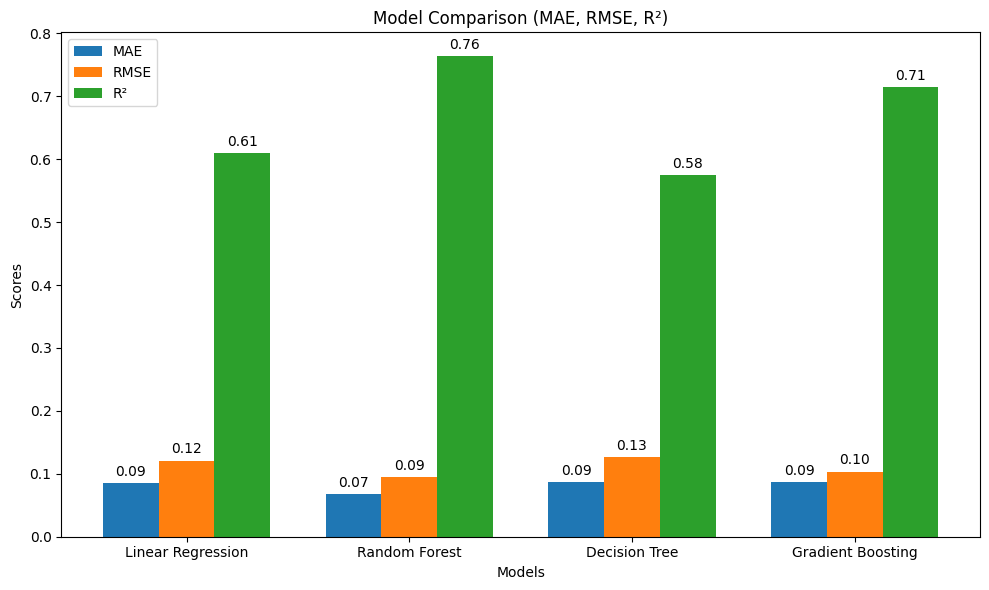

In [42]:
models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

mae_values = [lin_mae, forest_mae, decision_mae, gradient_mae]
rmse_values = [lin_rmse, forest_rmse, decision_rmse, gradient_rmse]
r2_values = [lin_r2, forest_r2, decision_r2, gradient_r2]

# Vẽ biểu đồ MAE, RMSE và R²
x = np.arange(len(models))  # Vị trí các mô hình trên trục x
width = 0.25  # Khoảng cách giữa các nhóm

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ cho MAE, RMSE và R²
rects1 = ax.bar(x - width, mae_values, width, label='MAE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, r2_values, width, label='R²')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison (MAE, RMSE, R²)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị trên từng cột
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text
                    textcoords="offset points",
                    ha='center', va='bottom')

# Gọi hàm add_labels để hiển thị giá trị trên các cột
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

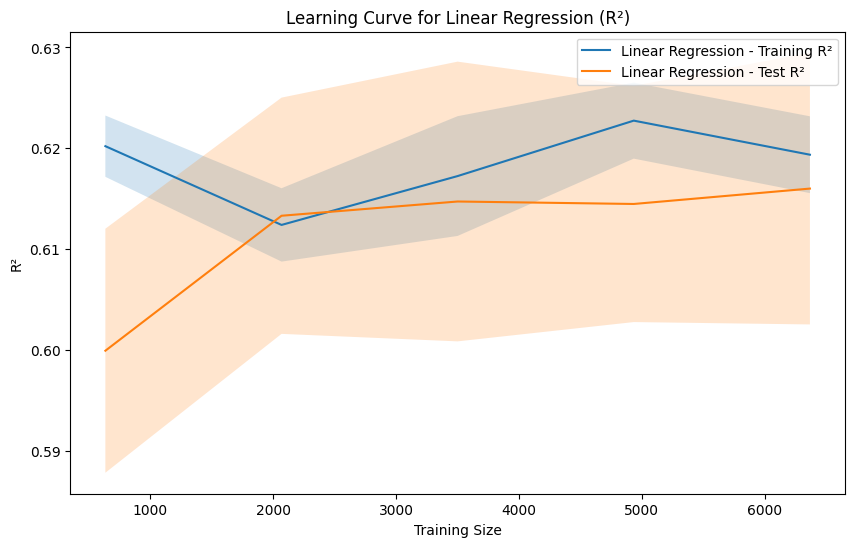

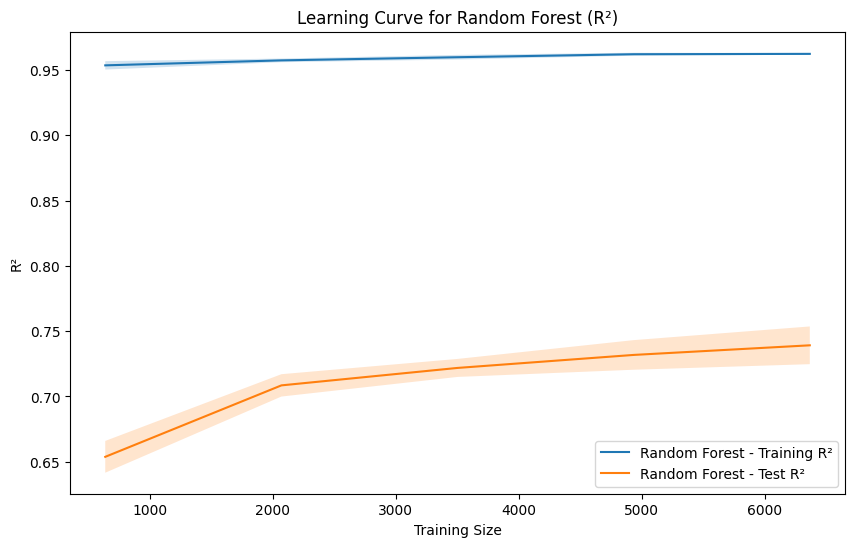

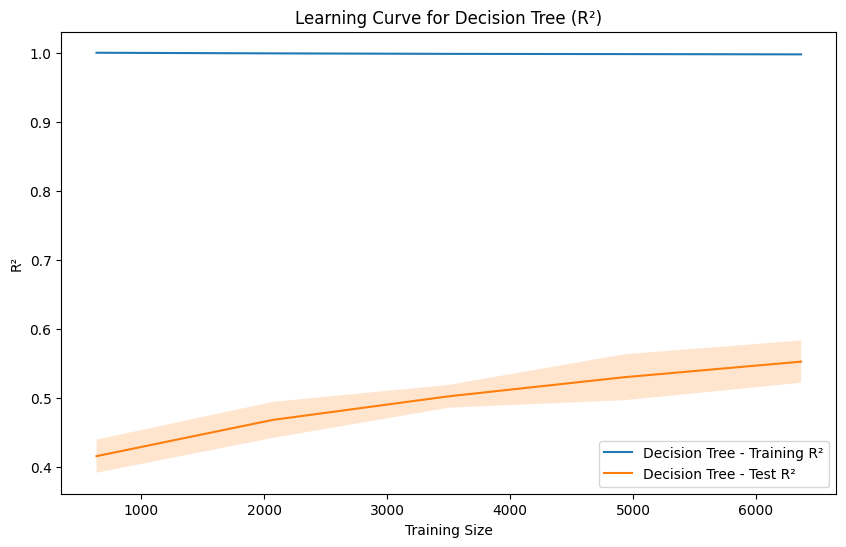

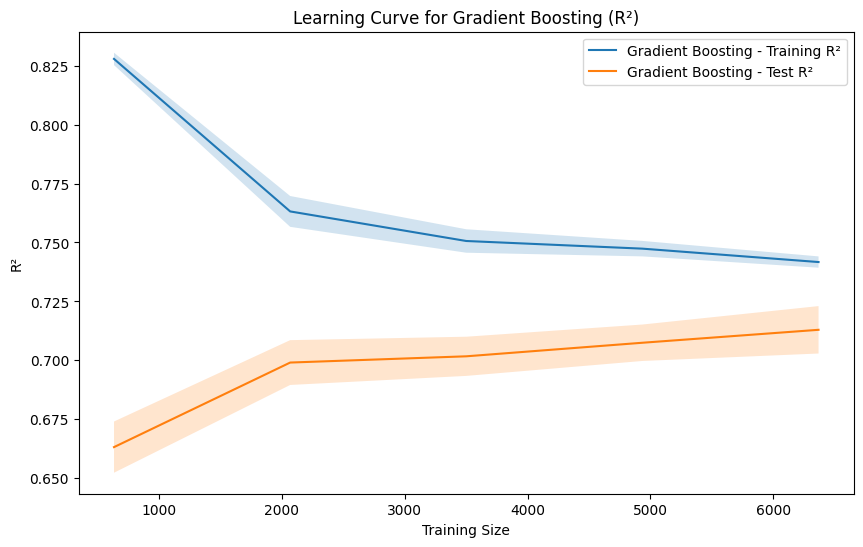

In [43]:
# Danh sách các mô hình
model_list = [linear_reg, rf_reg, dt_reg, gbs_reg]
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

for model, model_name in zip(model_list, model_names):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="r2")

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Tạo đồ thị riêng cho mỗi mô hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label=f"{model_name} - Training R²")
    plt.plot(train_sizes, test_mean, label=f"{model_name} - Test R²")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
    plt.xlabel('Training Size')
    plt.ylabel('R²')
    plt.legend()
    plt.title(f'Learning Curve for {model_name} (R²)')
    plt.show()


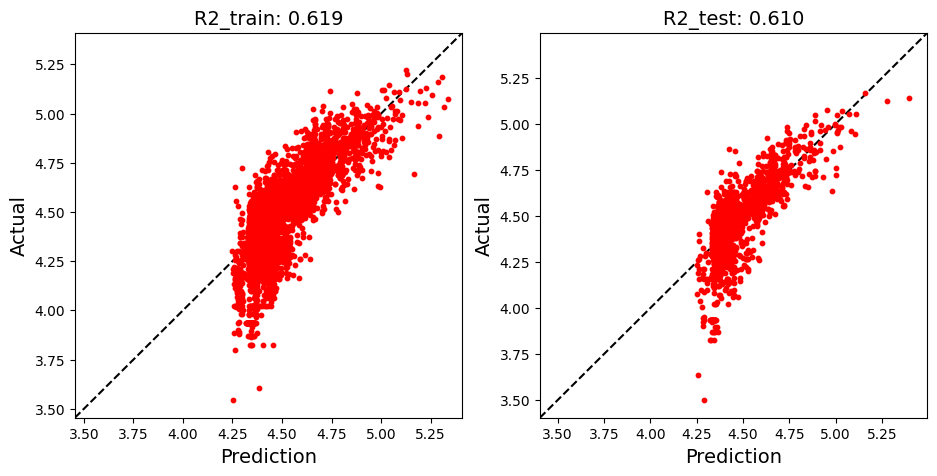

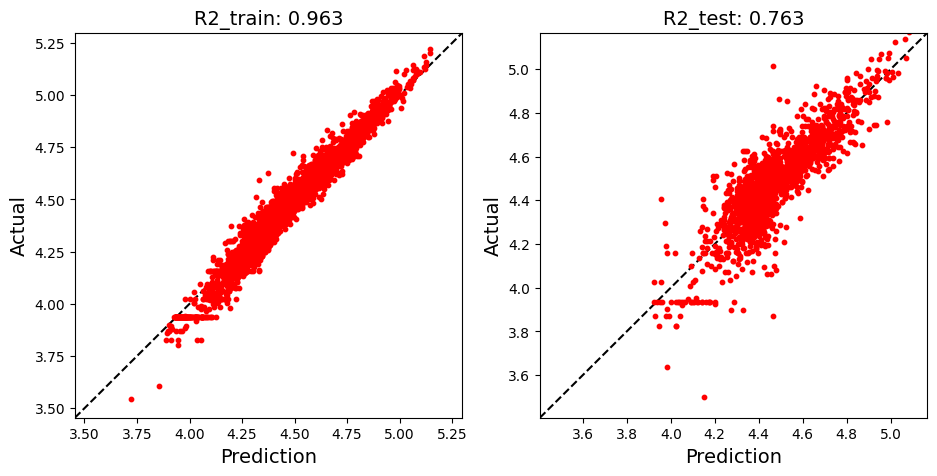

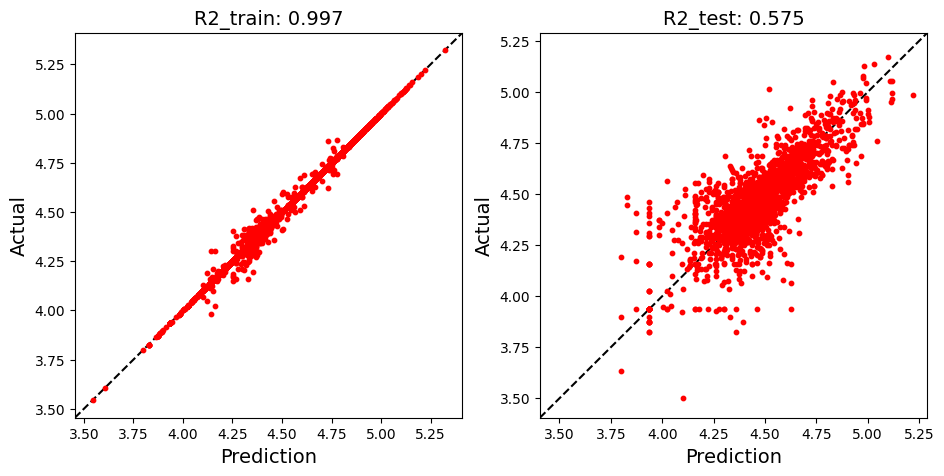

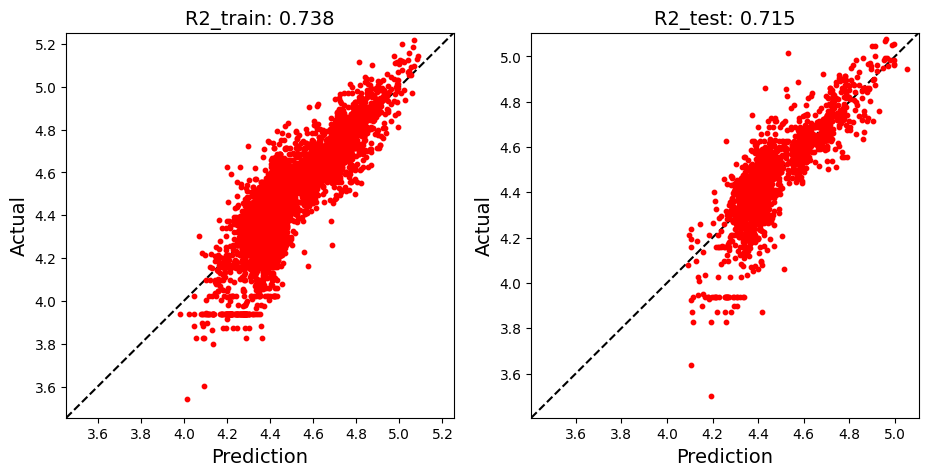

In [44]:
model_list = [linear_reg, rf_reg, dt_reg, gbs_reg]
for model in model_list:
    plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)


### Phân loại

In [45]:
log_reg = LogisticRegression(max_iter = 150)
rf_cls = RandomForestClassifier()
dt_cls = DecisionTreeClassifier()
knn_cls = KNeighborsClassifier(n_neighbors=1)
svm_model = SVC(kernel='rbf', random_state=42)

In [46]:
#Huấn luyện
log_reg.fit(X_train_class, y_train_class)
rf_cls.fit(X_train_class, y_train_class)
dt_cls.fit(X_train_class,y_train_class)
knn_cls.fit(X_train_class,y_train_class)
svm_model.fit(X_train_class, y_train_class)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(random_state=42)

In [47]:
y_pred_log_reg = log_reg.predict(X_test_class)
y_pred_rf_cls = rf_cls.predict(X_test_class)
y_pred_dt_cls = dt_cls.predict(X_test_class)
y_pred_knn_cls = knn_cls.predict(X_test_class)
y_pred_svm = svm_model.predict(X_test_class)

In [48]:
acc_log_reg = accuracy_score(y_test_class, y_pred_log_reg)
acc_pred_rf_cls =accuracy_score(y_test_class, y_pred_rf_cls)
acc_dt_cls = accuracy_score(y_test_class, y_pred_dt_cls)
acc_knn_cls = accuracy_score(y_test_class, y_pred_knn_cls)
acc_svm = accuracy_score(y_test_class, y_pred_svm)

In [49]:
print("Accuracy of Logistic Regression:\n",acc_log_reg)
print("Accuracy of Random Forest:\n",acc_pred_rf_cls)
print("Accuracy of Decision Tree:\n",acc_dt_cls )
print("Accuracy of Gradient Boosting:\n",acc_knn_cls)
print("Accuracy of SVM:\n",acc_svm)

Accuracy of Logistic Regression:
 0.6901172529313233
Accuracy of Random Forest:
 0.8964824120603015
Accuracy of Decision Tree:
 0.8592964824120602
Accuracy of Gradient Boosting:
 0.6763819095477387
Accuracy of SVM:
 0.6857621440536014


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


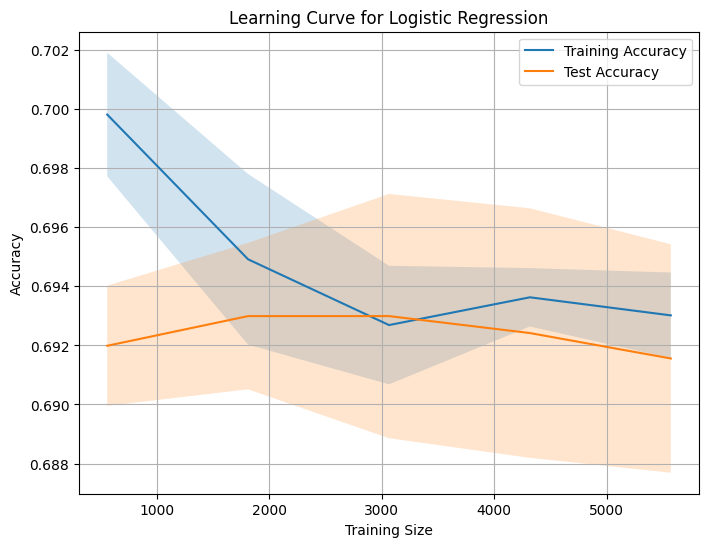

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


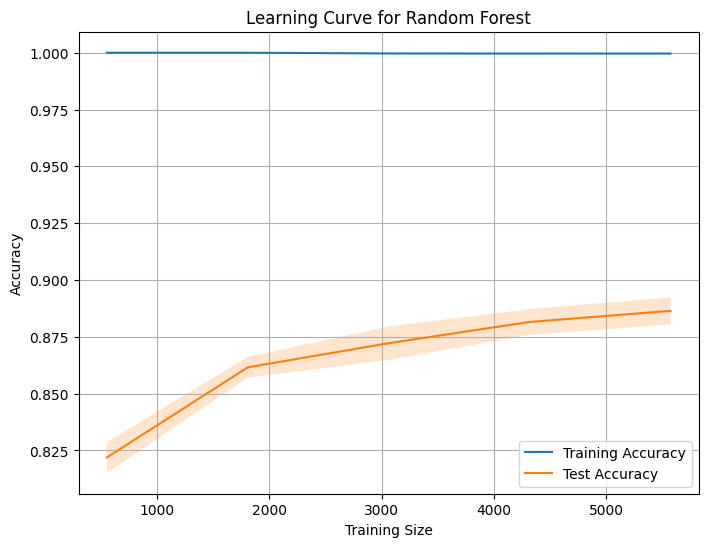

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


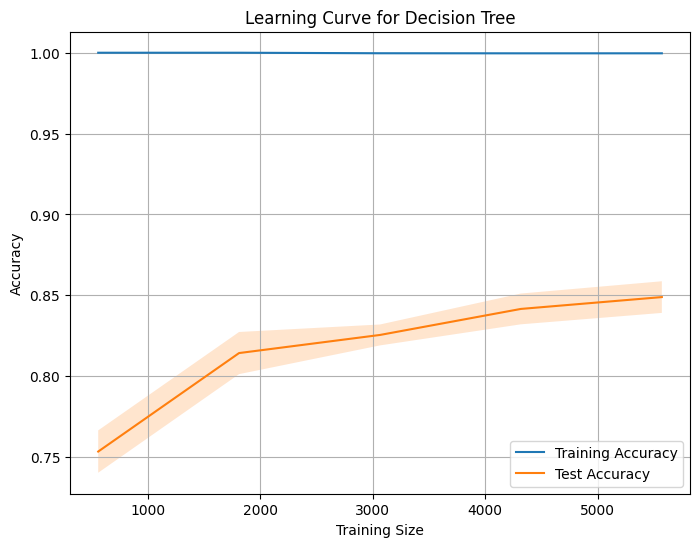

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


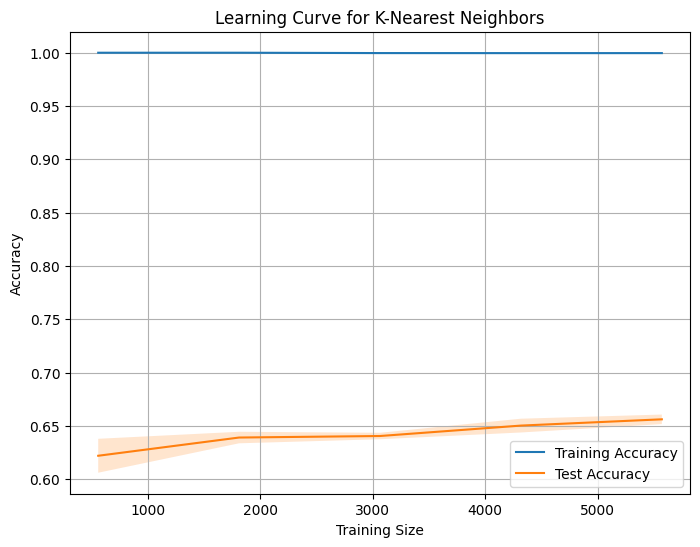

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


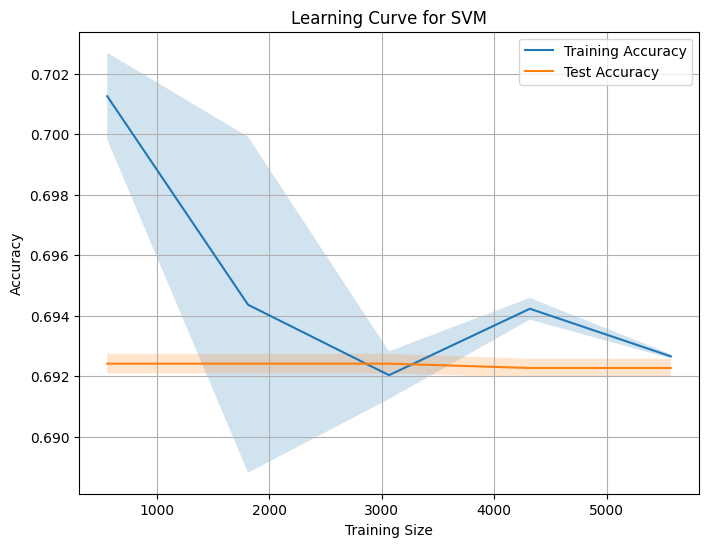

In [50]:
model_list = [log_reg, rf_cls, dt_cls, knn_cls, svm_model]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors', 'SVM']

# Vẽ learning curves cho từng mô hình
for model, model_name in zip(model_list, model_names):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_class, y_train_class, cv=5, scoring="accuracy", n_jobs=-1
    )

    # Tính trung bình và độ lệch chuẩn của điểm số trên tập huấn luyện và tập kiểm tra
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Vẽ learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_mean, label="Test Accuracy")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

    # Thêm tiêu đề và nhãn
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

## Câu 2

### Hồi quy

In [51]:
# linear_reg = LinearRegression()
# rf_reg = RandomForestRegressor(random_state=42)
# dt_reg = DecisionTreeRegressor()
# gbs_reg = GradientBoostingRegressor()

#### Xử lý RandomForestRegressor

In [52]:
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],

}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

best_rf_model

RandomForestRegressor(n_estimators=200)

In [53]:
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators':  [200],
    'max_depth': [10],
   'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

best_rf_model

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200)

In [54]:
rf_regressor = RandomForestRegressor()

param_grid = {
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators':  [200],
    'max_depth': [10],

    'min_samples_leaf': [2],

}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [55]:
rf_regressor = RandomForestRegressor()

param_grid = {
    'n_estimators':  [200],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'bootstrap': [True],
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_

best_rf_model

y_pred = best_rf_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)

mse

0.00919290615126161

In [56]:
evaluation_results = []

param_grid = {
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators':  [200],
    'max_depth': [10],
    'min_samples_leaf': [2],
}
param_combinations = list(ParameterGrid(param_grid))

for params in param_combinations:
    rf_model = RandomForestRegressor(**params)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results.append({
        'Hyperparameters': params,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

for result in evaluation_results:
    print("Hyperparameters:", result['Hyperparameters'])
    print("Mean Squared Error:", result['MSE'])
    print("Root Mean Squared Error:", result['RMSE'])
    print("Mean Absolute Error:", result['MAE'])
    print("R-squared (R2):", result['R2'])
    print()

Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.00924721167420723
Root Mean Squared Error: 0.09616242340024106
Mean Absolute Error: 0.06907451043541703
R-squared (R2): 0.7541499115705645

Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 0.009253347114129182
Root Mean Squared Error: 0.09619431955229572
Mean Absolute Error: 0.06912210259940323
R-squared (R2): 0.7539867922973708

Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.009257557265098264
Root Mean Squared Error: 0.09621620063740963
Mean Absolute Error: 0.06923161770017225
R-squared (R2): 0.7538748595305522

Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.

In [57]:
params = {
    'bootstrap': True,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Khởi tạo mô hình với tham số
model = RandomForestRegressor(**params)

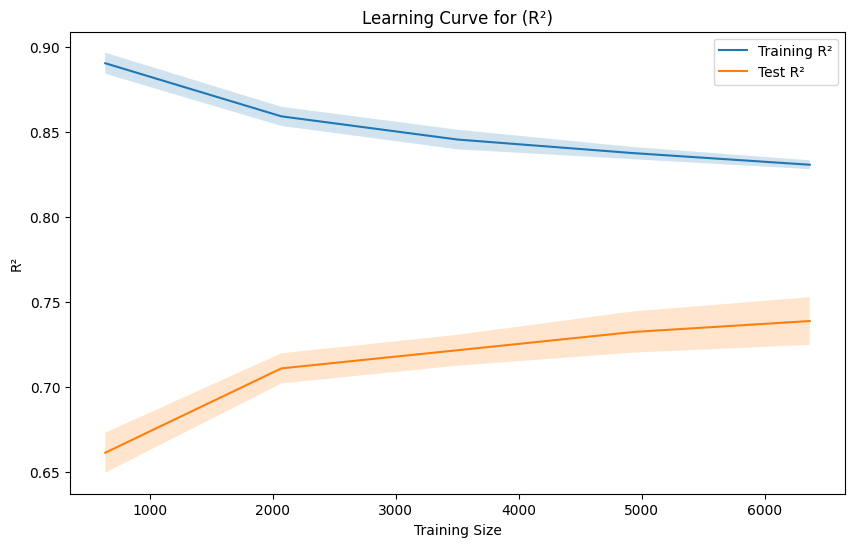

In [58]:
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring="r2")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tạo đồ thị riêng cho mỗi mô hình
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label=f"Training R²")
plt.plot(train_sizes, test_mean, label=f"Test R²")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.legend()
plt.title(f'Learning Curve for (R²)')
plt.show()

### Xử lý GradientBoostingRegressor

In [59]:
gb_regressor = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],

}

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_gb_model

GradientBoostingRegressor(learning_rate=0.2, n_estimators=200)

In [ ]:
gb_regressor = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [200],
    'learning_rate': [ 0.2],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10, 15],
}

grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_gb_model

In [ ]:
min_samples_leaf_values = [1, 2, 4, 5]

for min_samples_leaf in min_samples_leaf_values:
    gb_regressor = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.2,
        max_depth=5,
        min_samples_split=5,
        min_samples_leaf=min_samples_leaf
    )

    gb_regressor.fit(X_train, y_train)

    y_pred = gb_regressor.predict(X_test)

    mse = r2_score(y_test, y_pred)

    print(f"MAE for min_samples_leaf={min_samples_leaf}: {mse}")


In [ ]:
params = {
    'n_estimators':200,
    'learning_rate':0.2,
    'max_depth':5,
    'min_samples_split':5,
    'min_samples_leaf':2,
    'subsample': 0.8
}

gbs_regressor = GradientBoostingRegressor(**params)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(gbs_regressor, X_train, y_train, cv=5, scoring="r2")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tạo đồ thị riêng cho mỗi mô hình
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label=f"Training R²")
plt.plot(train_sizes, test_mean, label=f"Test R²")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.legend()
plt.title(f'Learning Curve for (R²)')
plt.show()

### Xử lý DecisionTreeRegressor

In [ ]:
dt_regressor = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_

In [ ]:
best_dt_model

In [ ]:
params = {
    'max_depth':10,
    'min_samples_split':2,
    'min_samples_leaf':10,
    'max_features': None
}

dt_regressor = DecisionTreeRegressor(**params)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(dt_regressor, X_train, y_train, cv=5, scoring="r2")

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Tạo đồ thị riêng cho mỗi mô hình
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label=f"Training R²")
plt.plot(train_sizes, test_mean, label=f"Test R²")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Thêm tiêu đề, nhãn và chú thích cho mỗi mô hình
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.legend()
plt.title(f'Learning Curve for (R²)')
plt.show()

### Xử lý LinearRegression

In [ ]:
ridge_results = {}

# Define alpha values
alpha_values = [0.1, 1, 10]

# Iterate over alpha values
for alpha in alpha_values:
    # Create Ridge Regression model
    ridge = Lasso(alpha=alpha)

    # Fit the model
    ridge.fit(X_train, y_train)

    # Make predictions
    predictions = ridge.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results in the dictionary
    ridge_results[alpha] = {'MSE': mse, 'R2': r2}

# Print results
for alpha, results in ridge_results.items():
    print(f"For alpha={alpha}:")
    print(f"Mean Squared Error (MSE): {results['MSE']}")
    print(f"R-squared (R²) Score: {results['R2']}")
